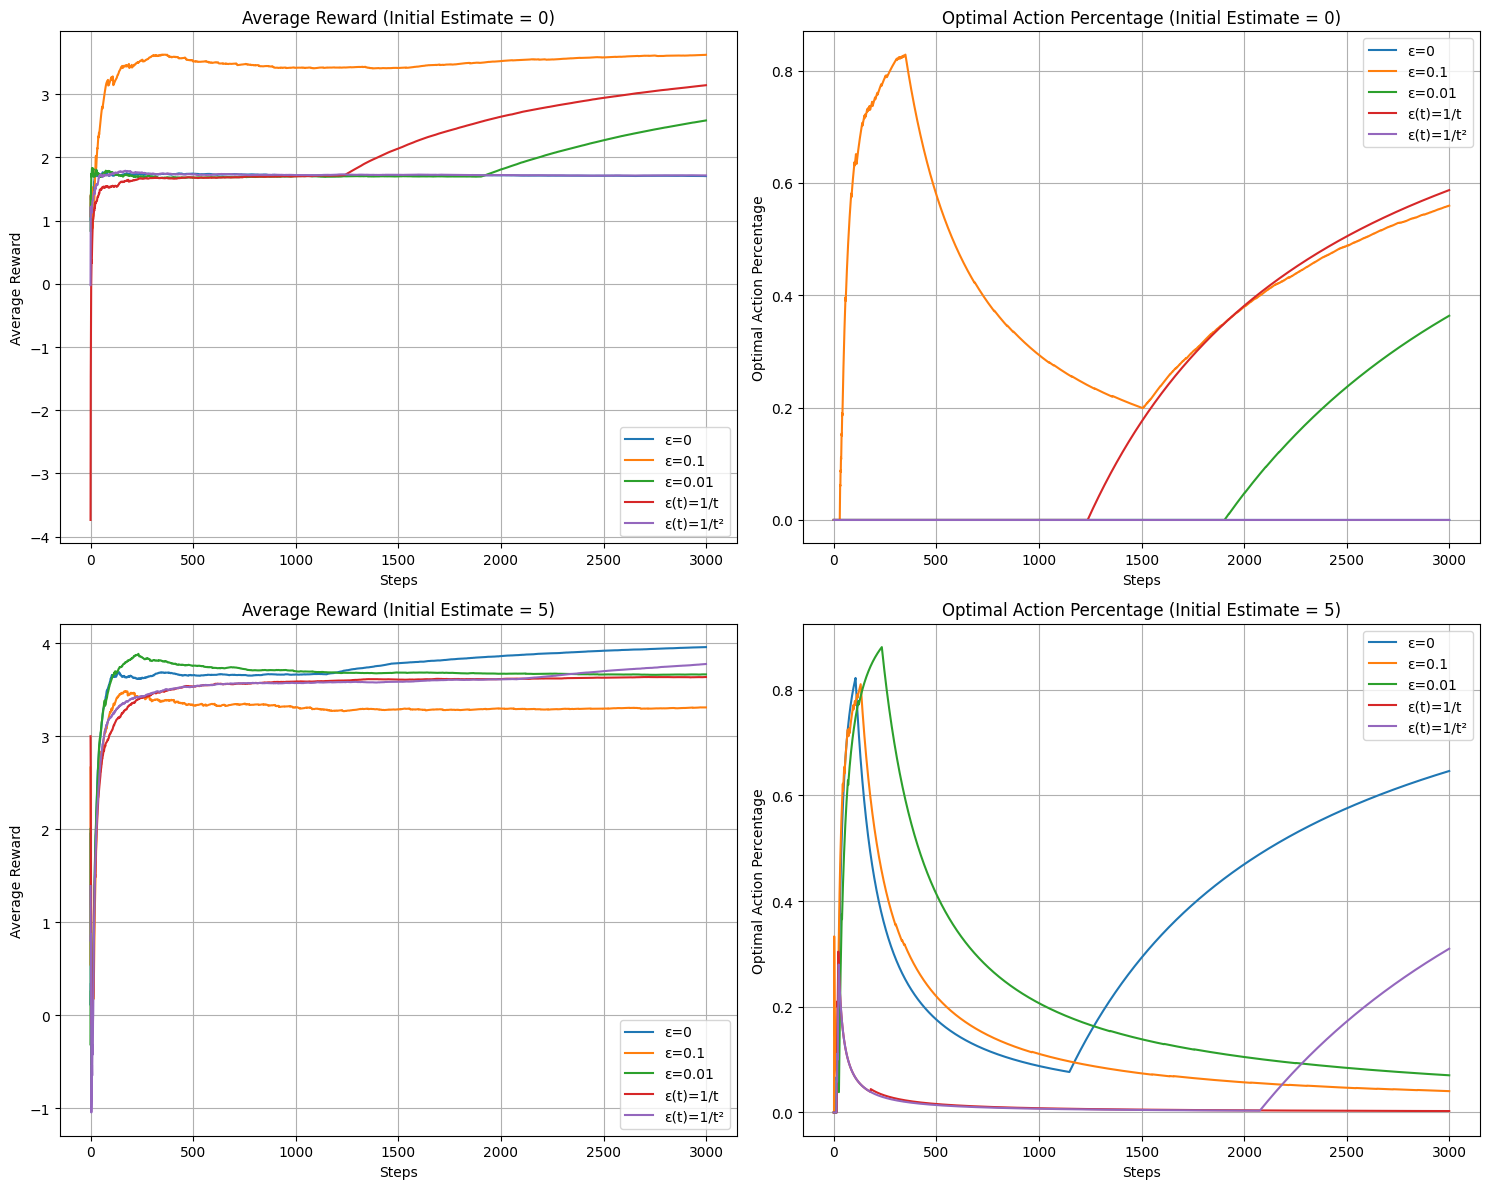

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
k = 15  # Number of arms
n_steps = 3000  # Number of steps
true_action_values = np.random.normal(0, 2, k)  # True action values from N(0, 2)

# Define epsilon values for different cases
epsilon_values = [0, 0.1, 0.01]  # Static epsilons
epsilon_dynamic = lambda t: 1/t  # Dynamic epsilon case
epsilon_dynamic_squared = lambda t: 1/(t**2)  # Another dynamic epsilon case

# Define a function to run the epsilon-greedy strategy
def run_bandit(epsilon, initial_estimate):
    action_values = np.full(k, initial_estimate)  # Initial estimates for action values
    action_counts = np.zeros(k)  # Number of times each arm is selected
    rewards = np.zeros(n_steps)  # Array to store rewards
    optimal_actions = np.zeros(n_steps)  # Track optimal action selection

    for step in range(n_steps):
        # Select an action using the epsilon-greedy policy
        if epsilon == 0:  # Pure exploitation
            action = np.argmax(action_values)
        else:  # Epsilon-greedy exploration
            if np.random.rand() < epsilon:
                action = np.random.choice(k)
            else:
                action = np.argmax(action_values)

        # Compute the reward (following N(q*(A_t), 1/2))
        reward = np.random.normal(true_action_values[action], 0.5)
        rewards[step] = reward

        # Update the estimated action-value function Q(a) using the sample-average method
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]

        # Track optimal action percentage
        optimal_action = np.argmax(true_action_values)
        if action == optimal_action:
            optimal_actions[step] = 1

    return rewards, optimal_actions

# Function to compute average rewards and optimal action percentages for different cases
def compute_metrics(initial_estimate):
    avg_rewards_results = {}
    optimal_actions_results = {}
    
    # Run for static epsilon values
    for epsilon in epsilon_values:
        rewards, optimal_actions = run_bandit(epsilon, initial_estimate)
        avg_rewards = np.cumsum(rewards) / (np.arange(n_steps) + 1)
        avg_rewards_results[f'ε={epsilon}'] = avg_rewards
        optimal_actions_results[f'ε={epsilon}'] = np.cumsum(optimal_actions) / (np.arange(n_steps) + 1)

    # Run for dynamic epsilon values
    for epsilon_func, label in zip([epsilon_dynamic, epsilon_dynamic_squared], 
                                    ['ε(t)=1/t', 'ε(t)=1/t²']):
        rewards = np.zeros(n_steps)
        action_values = np.full(k, initial_estimate)
        action_counts = np.zeros(k)
        optimal_actions = np.zeros(n_steps)

        for step in range(n_steps):
            epsilon = epsilon_func(step + 1)  # Update epsilon for current step
            # Select an action using the epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = np.random.choice(k)
            else:
                action = np.argmax(action_values)

            # Compute the reward (following N(q*(A_t), 1/2))
            reward = np.random.normal(true_action_values[action], 0.5)
            rewards[step] = reward

            # Update the estimated action-value function Q(a)
            action_counts[action] += 1
            action_values[action] += (reward - action_values[action]) / action_counts[action]

            # Track optimal action percentage
            optimal_action = np.argmax(true_action_values)
            if action == optimal_action:
                optimal_actions[step] = 1

        avg_rewards = np.cumsum(rewards) / (np.arange(n_steps) + 1)
        avg_rewards_results[label] = avg_rewards
        optimal_actions_results[label] = np.cumsum(optimal_actions) / (np.arange(n_steps) + 1)

    return avg_rewards_results, optimal_actions_results

# Compute metrics for both initial estimates (0 and 5)
avg_rewards_0, optimal_actions_0 = compute_metrics(initial_estimate=0)
avg_rewards_5, optimal_actions_5 = compute_metrics(initial_estimate=5)

# Plotting the results
plt.figure(figsize=(15, 12))

# Plot for initial estimate = 0: Average Reward
plt.subplot(2, 2, 1)
for label, avg_reward in avg_rewards_0.items():
    plt.plot(avg_reward, label=label)
plt.title('Average Reward (Initial Estimate = 0)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid()

# Plot for initial estimate = 0: Optimal Action Percentage
plt.subplot(2, 2, 2)
for label, optimal_action in optimal_actions_0.items():
    plt.plot(optimal_action, label=label)
plt.title('Optimal Action Percentage (Initial Estimate = 0)')
plt.xlabel('Steps')
plt.ylabel('Optimal Action Percentage')
plt.legend()
plt.grid()

# Plot for initial estimate = 5: Average Reward
plt.subplot(2, 2, 3)
for label, avg_reward in avg_rewards_5.items():
    plt.plot(avg_reward, label=label)
plt.title('Average Reward (Initial Estimate = 5)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid()

# Plot for initial estimate = 5: Optimal Action Percentage
plt.subplot(2, 2, 4)
for label, optimal_action in optimal_actions_5.items():
    plt.plot(optimal_action, label=label)
plt.title('Optimal Action Percentage (Initial Estimate = 5)')
plt.xlabel('Steps')
plt.ylabel('Optimal Action Percentage')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
